# MLFLOW

MLflow is an open source platform for managing the end-to-end machine learning lifecycle. It enables Data Scientists to easily track the progress during the model development and tuning. It takes care of the packaging and deployment of models, no matter which framework or programming language was used to create it. In addition, MLflow provides a registry, where the models we want to keep or share can be safely stored and readily accessible It has the following primary components:

* **Tracking**: Allows you to track experiments to record and compare parameters and results. The MLflow Tracking component is an API and UI for logging parameters, code versions, metrics, and output files when running your machine learning code and for later visualizing the results. MLflow Tracking lets you log and query experiments using Python, REST, R API, and Java API APIs.
* **Models:** Allow you to manage and deploy models from a variety of ML libraries to a variety of model serving and inference platforms. An MLflow Model is a standard format for packaging machine learning models that can be used in a variety of downstream tools—for example, real-time serving through a REST API or batch inference on Apache Spark. The format defines a convention that lets you save a model in different “flavors” that can be understood by different downstream tools
* **Projects:** Allow you to package ML code in a reusable, reproducible form to share with other data scientists or transfer to production. An MLflow Project is a format for packaging data science code in a reusable and reproducible way, based primarily on conventions. In addition, the Projects component includes an API and command-line tools for running projects, making it possible to chain together projects into workflows
* **Model Registry:** Allows you to centralize a model store for managing models’ full lifecycle stage transitions: from staging to production, with capabilities for versioning and annotating. The MLflow Model Registry component is a centralized model store, set of APIs, and UI, to collaboratively manage the full lifecycle of an MLflow Model. It provides model lineage (which MLflow experiment and run produced the model), model versioning, stage transitions (for example from staging to production), and annotations.


Important Definition in MLFlow: 


- **Run** is the individual execution of a code of a model. Each run will generate new folders and files, depending on what we decide to log.
- **Experiment** is a named group of runs.

In [16]:
import os
import sys
import mlflow
print(f"MLFlow version: {mlflow.__version__}")
import pandas as pd
import numpy as np

from time import time
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


MLFlow version: 1.20.2


## WAYS TO START THE SERVER/TRACING URI

1. Run **mlflow ui** in the command line. Remember that the path to execute this command at the same level of the mlruns folder. In the latter directory, all the information regarding experiments, runs and artifacts is stored. 

2. Use the **mlflow.set_tracking_uri()** method to connect to a server with mlflow. 

### TYPES OF EXPERIMENTS WHEN USING MLFLOW IN DATABRICKS.

There are two types of experiments in MLflow: notebook and workspace.

* **A notebook experiment** is associated with a specific notebook. Databricks creates a notebook experiment by default when a run is started using mlflow.start_run() and there is no active experiment.
IF neither the experiment_id nor the experiment_name parameter is provided. MLflow automatically creates a notebook experiment and logs runs to it. The following example highlights that case:
```python
    with mlflow.run():
        mlflow.log_metric()
        mlflow.log_param()
```
        
* **Workspace experiments** are not associated with any notebook, and any notebook can log a run to these experiments by using the experiment name or the experiment ID when initiating a run. To log MLflow runs to a workspace experiment, use **mlflow.set_experiment()** as illustrated in the following code block. An alternative is to set the experiment_id parameter in mlflow.start_run(); for example, 
```python 
    experiment_id = mlflow.set_experiment(experiment_name)
    mlflow.start_run(experiment_id=1234567)
    
 
#### Where are metrics logged?

All MLflow runs are logged to the active experiment, which can be set using any of the following ways:

- Use the mlflow.set_experiment() command.
- Use the experiment_id parameter in the mlflow.start_run() command.
- Set one of the MLflow environment variables MLFLOW_EXPERIMENT_NAME or MLFLOW_EXPERIMENT_ID.
- If no active experiment is set, runs are logged to the notebook experiment.

### FOLDER STRUCTURE OF LOGGED ARTIFACTS

### MODEL FOLDER STRUCTURE

## EXPERIMENT WITH METRICS USING DIABITIS DATASET

In [2]:
# Load diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
 
# Create pandas DataFrame 
Y = np.array([y]).transpose()
d = np.concatenate((X, Y), axis=1)
cols = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'progression']
data = pd.DataFrame(d, columns=cols)

# Split the data into training and test sets. (0.75, 0.25) split.
train, test = train_test_split(data)

# The predicted column is "progression" which is a quantitative measure of disease progression one year after baseline
X_train = train.drop(["progression"], axis=1)
X_test = test.drop(["progression"], axis=1)
y_train = train[["progression"]]
y_test = test[["progression"]]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


RUN ID: 30249e540b15486694f3a2ea2e528877
	 MAE: 50.49716190883999
	 MSE: 4250.050507535945
	 R2: 0.2205259426635201




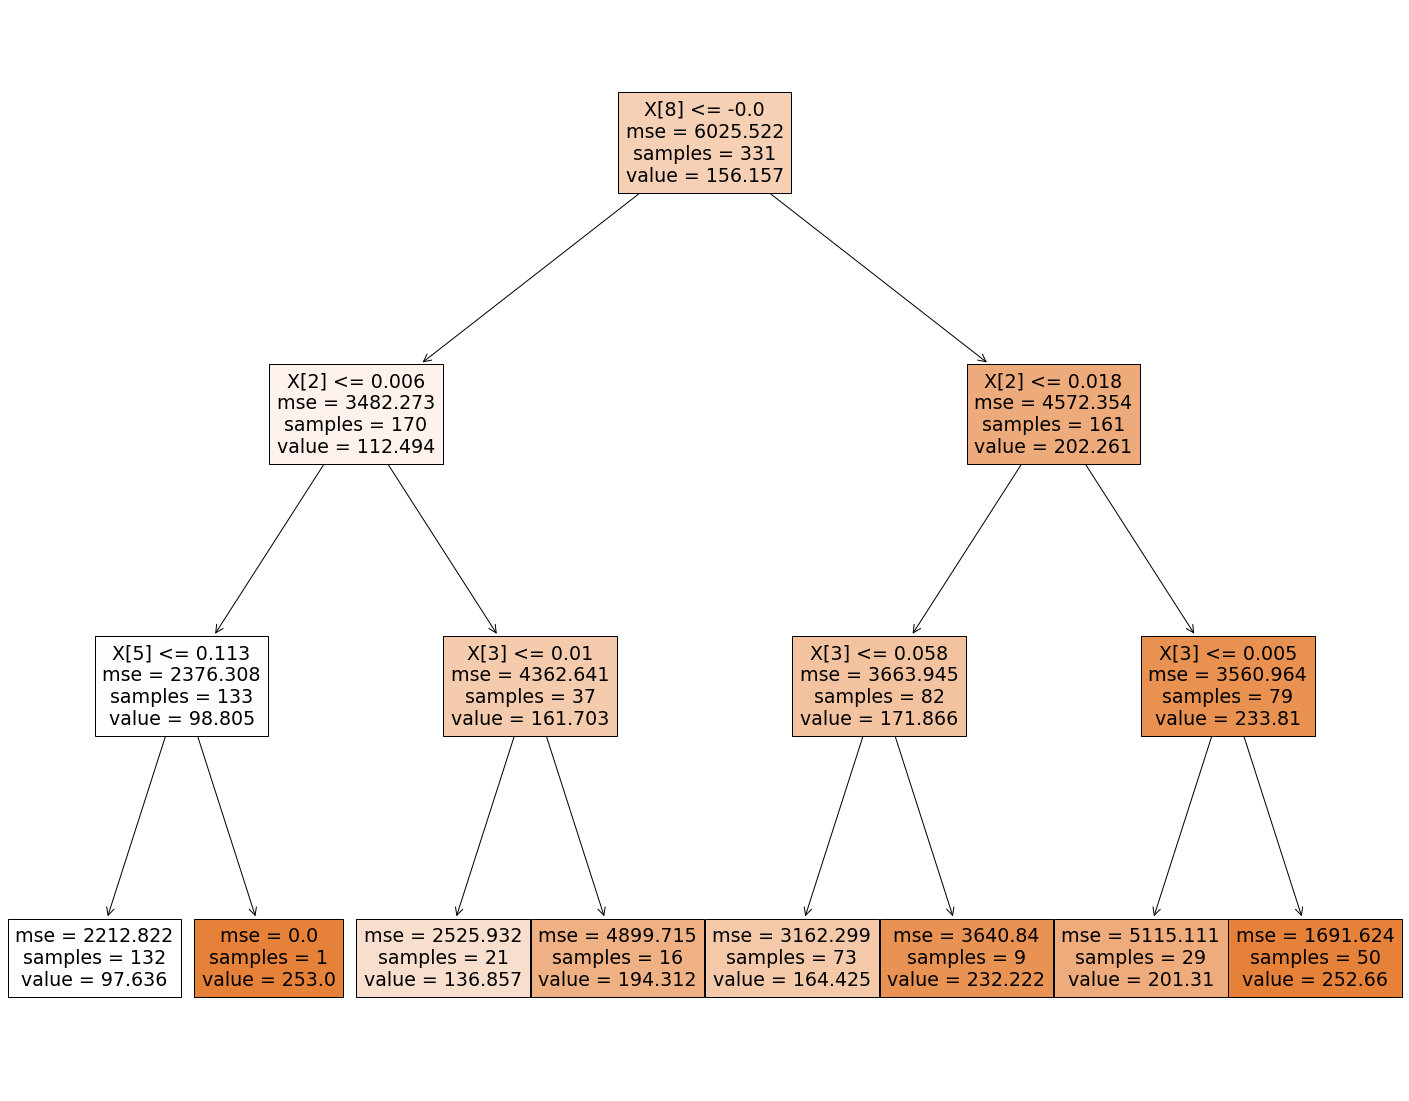

In [32]:
# enable autologging
mlflow.sklearn.autolog() #with that line all the parameters of the RF object will be logged plus the training metrics

experiment_id = mlflow.create_experiment(f"experiment_test_{datetime.now().strftime('%Y_%m_%d_%H_%M_%S')}")


with mlflow.start_run(experiment_id=experiment_id) as run:
    ## fit a random forest regressor. 

    start_time = time()
    model = DecisionTreeRegressor(max_depth=3,
                                 min_samples_split=4)
    model.fit(X_train, y_train)

    training_time = time() - start_time

    # make predictions
    y_pred = model.predict(X_test)

    #create a csv file with predictions
    df_pred = pd.DataFrame(y_pred)
    df_pred.to_csv('output/data/test_predictions.csv')
    
    #save figure as png of the decision tree
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                       filled=True)
    fig.savefig('output/images/decision_tree.png')

    #calculate all regression metrics, mae, mse, r2
    mae = mean_absolute_error(y_test, y_pred)
    print(f"RUN ID: {run.info.run_id}")
    print(f"\t MAE: {mae}")
    mse = mean_squared_error(y_test, y_pred)
    print(f"\t MSE: {mse}")
    r2 = r2_score(y_test, y_pred)
    print(f"\t R2: {r2}")
    print('\n')



    #log the metrics with test set (bias), with sklearn.autolog, only training metrics are logged (variance)
    mlflow.log_metric('mae_test', mae)
    mlflow.log_metric('mse_test', mae)
    mlflow.log_metric('r2_test', r2)
    
    #log with mlflow 
    mlflow.log_artifact('output/data/test_predictions.csv')
    mlflow.log_artifact('output/images/decision_tree.png')


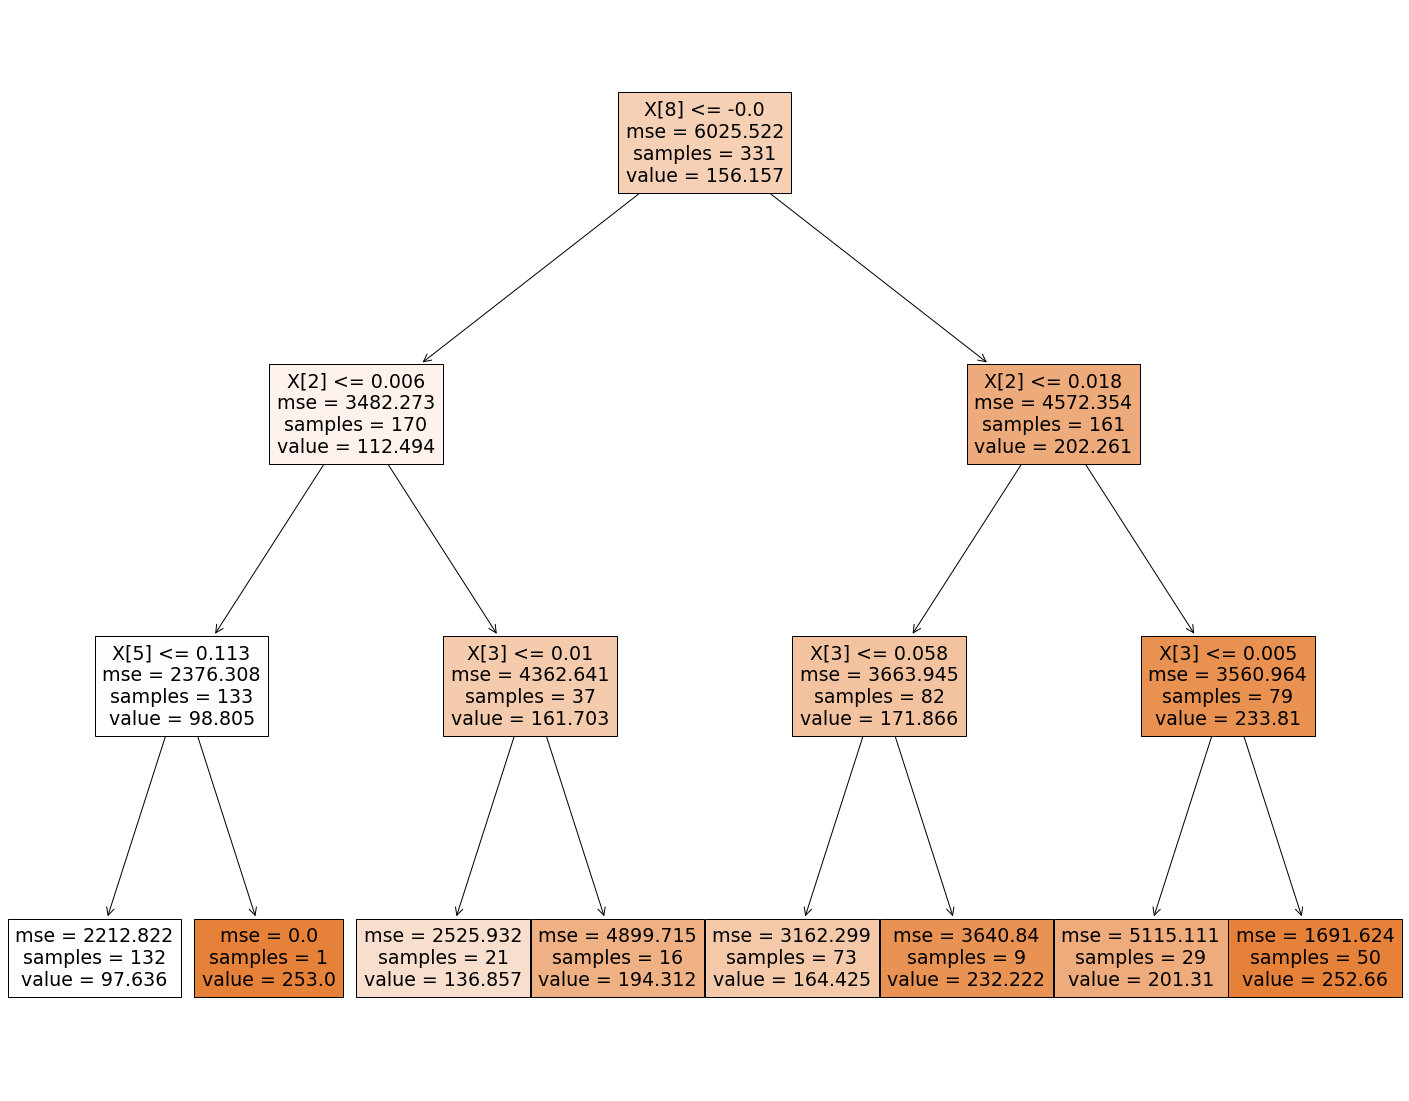

In [25]:
fig.save('output/images/decision_tree.png')

AttributeError: 'list' object has no attribute 'save'

In [26]:
fig

[Text(167.4, 190.26, 'X[8] <= -0.0\nmse = 6025.522\nsamples = 331\nvalue = 156.157'),
 Text(83.7, 135.9, 'X[2] <= 0.006\nmse = 3482.273\nsamples = 170\nvalue = 112.494'),
 Text(41.85, 81.53999999999999, 'X[5] <= 0.113\nmse = 2376.308\nsamples = 133\nvalue = 98.805'),
 Text(20.925, 27.180000000000007, 'mse = 2212.822\nsamples = 132\nvalue = 97.636'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 0.0\nsamples = 1\nvalue = 253.0'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 0.01\nmse = 4362.641\nsamples = 37\nvalue = 161.703'),
 Text(104.625, 27.180000000000007, 'mse = 2525.932\nsamples = 21\nvalue = 136.857'),
 Text(146.475, 27.180000000000007, 'mse = 4899.715\nsamples = 16\nvalue = 194.312'),
 Text(251.10000000000002, 135.9, 'X[2] <= 0.018\nmse = 4572.354\nsamples = 161\nvalue = 202.261'),
 Text(209.25, 81.53999999999999, 'X[3] <= 0.058\nmse = 3663.945\nsamples = 82\nvalue = 171.866'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 3162.299\nsamples = 73\nvalue =